In [1]:
import pandas as pd

df = pd.read_csv("churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


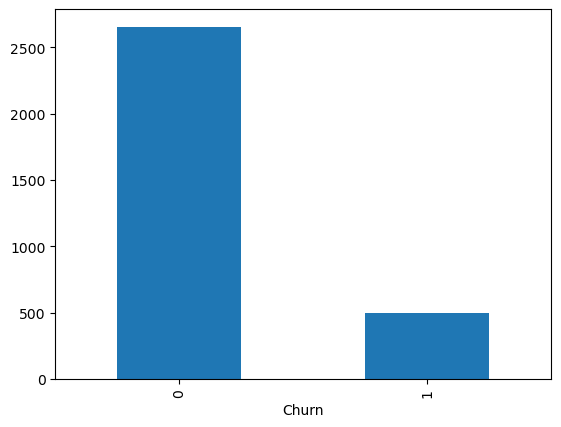

In [2]:
import seaborn as sb
import matplotlib.pyplot as plt

df["Churn"].value_counts().plot(kind="bar")
plt.show()

In [3]:
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [5]:
df.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X=df.drop("Churn",axis=1)
y=df["Churn"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       520
           1       0.73      0.43      0.54       110

    accuracy                           0.87       630
   macro avg       0.81      0.70      0.73       630
weighted avg       0.86      0.87      0.86       630



## Model1 : UnderSampling

In [13]:
y_train.value_counts()

Churn
0    2135
1     385
Name: count, dtype: int64

In [14]:
!pip install imblearn

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus = rus.fit_resample(X_train,y_train)
y_train_rus.value_counts()

Churn
0    385
1    385
Name: count, dtype: int64

In [18]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_rus,y_train_rus)
y_pred_rus = model.predict(X_test)

report = classification_report(y_test,y_pred_rus)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88       520
           1       0.49      0.82      0.61       110

    accuracy                           0.82       630
   macro avg       0.72      0.82      0.75       630
weighted avg       0.87      0.82      0.84       630



### SMOTE : OverSmapling

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

Churn
0    2135
1    2135
Name: count, dtype: int64

In [21]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote,y_train_smote)
y_pred_smote = model.predict(X_test)

report = classification_report(y_test,y_pred_smote)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       520
           1       0.46      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.86      0.80      0.82       630



### SMOTE : Tomek Links

In [23]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train_smt,y_train_smt = smote_tomek.fit_resample(X_train,y_train)
y_train_smt.value_counts()

Churn
0    2108
1    2108
Name: count, dtype: int64

In [24]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smt,y_train_smt)
y_pred_smt = model.predict(X_test)

report = classification_report(y_test,y_pred_smt)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       520
           1       0.46      0.80      0.59       110

    accuracy                           0.80       630
   macro avg       0.71      0.80      0.73       630
weighted avg       0.86      0.80      0.82       630

